In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.7.0
Eager execution: True


In [ ]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))


Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [ ]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [ ]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [ ]:
batch_size = 120

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [ ]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(120,), dtype=float32, numpy=
array([6.6, 5.6, 5.4, 4.7, 6.3, 5. , 7.4, 6.9, 5.2, 6.7, 5.7, 5.8, 5.1,
       6.4, 5.7, 4.6, 4.9, 6.4, 4.9, 5.8, 7.6, 7.2, 5.4, 4.5, 6.5, 5.8,
       6.9, 5.4, 6.1, 5.2, 5.1, 5.1, 5.7, 5.8, 6. , 7.2, 5. , 6.1, 5.8,
       4.9, 4.6, 5. , 7.7, 4.6, 5.1, 5. , 5.7, 6.8, 6. , 6. , 7.7, 4.4,
       6.7, 5.7, 5.5, 4.8, 4.6, 4.8, 6.3, 7.7, 6.1, 6.4, 6.7, 4.7, 7.9,
       6.3, 6.4, 6.5, 6.5, 6.3, 5.5, 5.4, 4.8, 6.6, 6.5, 5.3, 5.5, 7.7,
       4.9, 6.9, 5. , 5.1, 5.4, 5.8, 5.5, 7.2, 6.2, 6.8, 5. , 6.1, 5. ,
       6.4, 4.9, 6. , 6.8, 5.9, 5.6, 6.2, 6.1, 7.3, 5.1, 6.4, 5. , 5.6,
       5. , 4.4, 4.9, 4.4, 4.8, 5.7, 5.9, 6.7, 6.5, 5. , 6.3, 6.2, 6.3,
       7. , 5.2, 6.7], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(120,), dtype=float32, numpy=
array([3. , 2.9, 3.9, 3.2, 3.4, 3.3, 2.8, 3.1, 2.7, 3. , 4.4, 2.7, 3.8,
       3.2, 2.9, 3.2, 3.1, 2.7, 2.4, 2.7, 3. , 3.6, 3.4, 2.3, 3. , 2.6,
       3.2, 3.7, 3. , 3.4

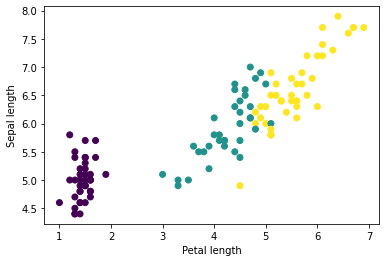

In [ ]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [ ]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [ ]:
X = np.array(list(features.values()))
Y = np.array(labels)
Y = Y.reshape(1, Y.size)
X = X.T
Y = Y.T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(X_train.shape)
print(X_test.shape)
print("Train:\n", Y_train, '\n\n', "Test:\n", Y_test)

(90, 4)
(30, 4)
Train:
 [[1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [2]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [2]
 [2]
 [1]
 [0]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [2]
 [0]
 [1]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [1]
 [0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [2]
 [1]] 

 Test:
 [[2]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [2]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [1]
 [2]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [2]
 [2]]


In [ ]:
#Tensors are features, labels
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1000, activation = "relu"),
                             tf.keras.layers.Dense(500, activation = "relu"),
                             tf.keras.layers.Dense(300, activation = "relu"),
                             tf.keras.layers.Dropout(.2),
                             tf.keras.layers.Dense(3, activation = "softmax", name = "output_dense")
                             ])
model.build(input_shape = (90,4))
model.summary()

epochs = 5

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(
    name="sparse_categorical_crossentropy"),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.fit(X_train, Y_train, epochs=epochs)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (90, 1000)                5000      
                                                                 
 dense_22 (Dense)            (90, 500)                 500500    
                                                                 
 dense_23 (Dense)            (90, 300)                 150300    
                                                                 
 dropout_7 (Dropout)         (90, 300)                 0         
                                                                 
 output_dense (Dense)        (90, 3)                   903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3/3 [==============================] -

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 144ms/step - loss: 0.4272 - sparse_categorical_accuracy: 0.7667


[0.42723941802978516, 0.7666666507720947]